In [1]:
import pandas as pd
file_path = "IEA Global EV Data 2024.xlsx"
df = pd.read_excel(file_path)

In [2]:
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


In [3]:
# Step 3: Display basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nPreview of data:")
display(df.head())

# Step 4: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 5: Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

Shape of dataset: (12654, 8)

Column names:
 Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

Preview of data:


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000



Missing values per column:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

Number of duplicate rows: 0


In [4]:
# Step 1: Explore unique values in key columns
print("Unique Regions:", df['region'].unique()[:10])  # show first 10
print("\nUnique Categories:", df['category'].unique())
print("\nUnique Parameters:", df['parameter'].unique())
print("\nUnique Modes:", df['mode'].unique())
print("\nUnique Powertrains:", df['powertrain'].unique())

# Step 2: Filter dataset for a specific parameter (e.g. 'EV sales')
df_ev_sales = df[df['parameter'].str.contains("sales", case=False, na=False)]

# Step 3: Check a few rows
display(df_ev_sales.head())

Unique Regions: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica']

Unique Categories: ['Historical' 'Projection-STEPS' 'Projection-APS']

Unique Parameters: ['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']

Unique Modes: ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']

Unique Powertrains: ['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCEV']


,region,category,parameter,mode,powertrain,year,unit,value
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.0065
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.0300
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0000


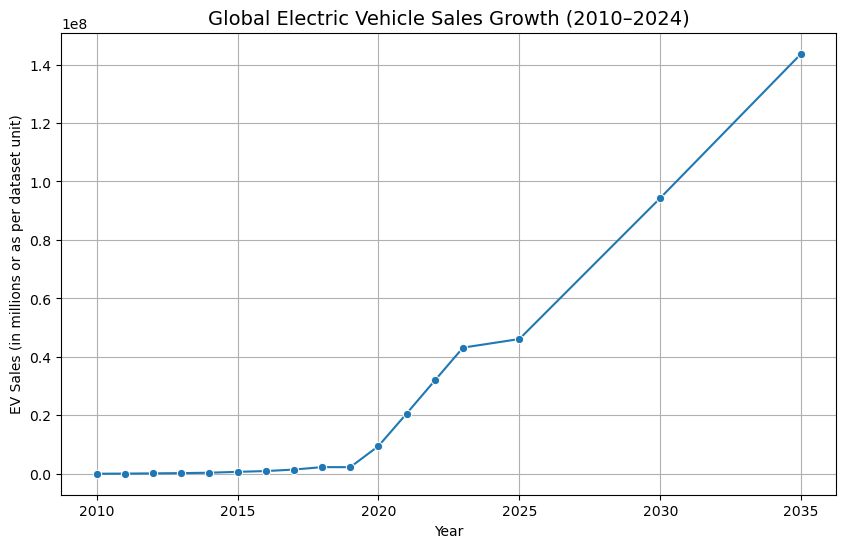

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter for Global EV sales data
df_global = df[(df['region'] == 'World') & (df['parameter'].str.contains("sales", case=False))]

# Step 2: Group by year and sum the values
global_trend = df_global.groupby('year')['value'].sum().reset_index()

# Step 3: Plot EV sales trend
plt.figure(figsize=(10,6))
sns.lineplot(data=global_trend, x='year', y='value', marker='o')
plt.title('Global Electric Vehicle Sales Growth (2010–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('EV Sales (in millions or as per dataset unit)')
plt.grid(True)
plt.show()

In [11]:
df['parameter'].unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [9]:
df_ev_sales = df[df['parameter'] == 'EV sales']
print(sorted(df_ev_sales['year'].unique()))

[np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2025), np.int64(2030), np.int64(2035)]


C:\Users\AMITHA\AppData\Local\Temp\ipykernel_13700\2307131699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='region', y='value', palette='mako')


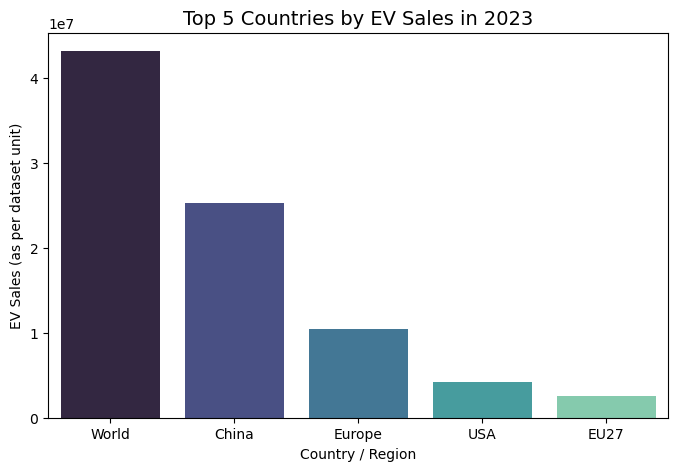

In [12]:
latest_year = 2023  # <-- change if needed

df_latest = df_ev_sales[df_ev_sales['year'] == latest_year]
country_sales = df_latest.groupby('region')['value'].sum().reset_index()
top5 = country_sales.sort_values(by='value', ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(data=top5, x='region', y='value', palette='mako')
plt.title(f'Top 5 Countries by EV Sales in {latest_year}', fontsize=14)
plt.xlabel('Country / Region')
plt.ylabel('EV Sales (as per dataset unit)')
plt.show()

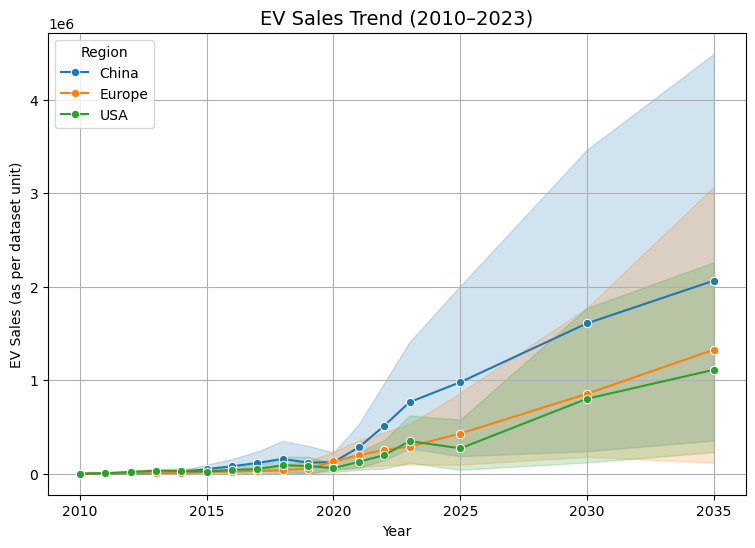

In [13]:
# Filter only 'EV sales' parameter
df_sales = df[df['parameter'] == 'EV sales']

# Select main regions
regions = ['China', 'Europe', 'USA']
df_trend = df_sales[df_sales['region'].isin(regions)]

plt.figure(figsize=(9,6))
sns.lineplot(data=df_trend, x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Trend (2010–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('EV Sales (as per dataset unit)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

C:\Users\AMITHA\AppData\Local\Temp\ipykernel_13700\2338269842.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


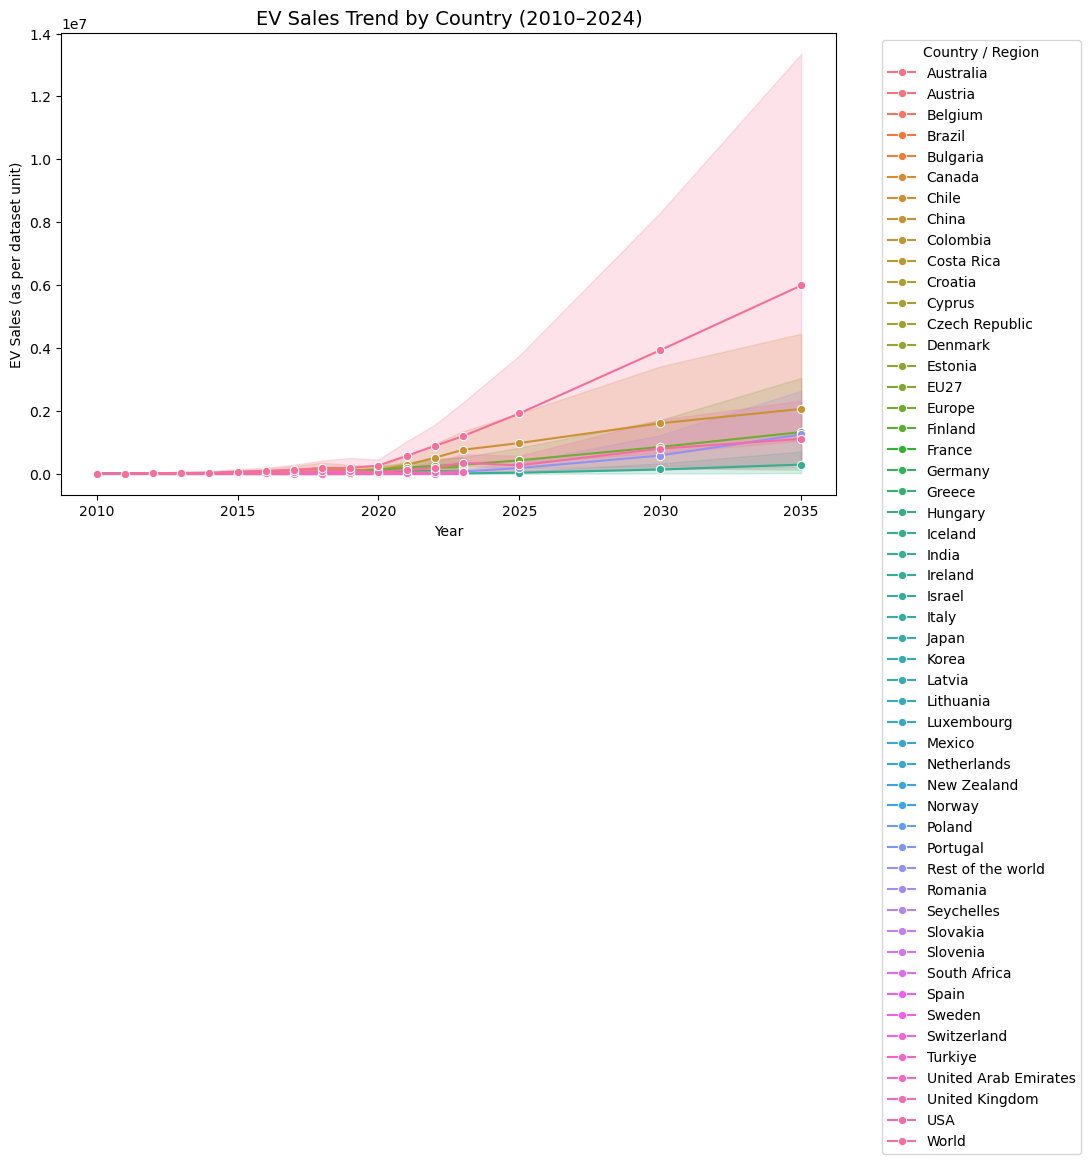

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for EV Sales data only
ev_sales_trend = df[df['parameter'] == 'EV sales']

# Create line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=ev_sales_trend, x='year', y='value', hue='region', marker='o')

# Chart labels and style
plt.title('EV Sales Trend by Country (2010–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('EV Sales (as per dataset unit)')
plt.legend(title='Country / Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\AMITHA\AppData\Local\Temp\ipykernel_13700\3399424517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=powertrain_sales, x='powertrain', y='value', palette='coolwarm')


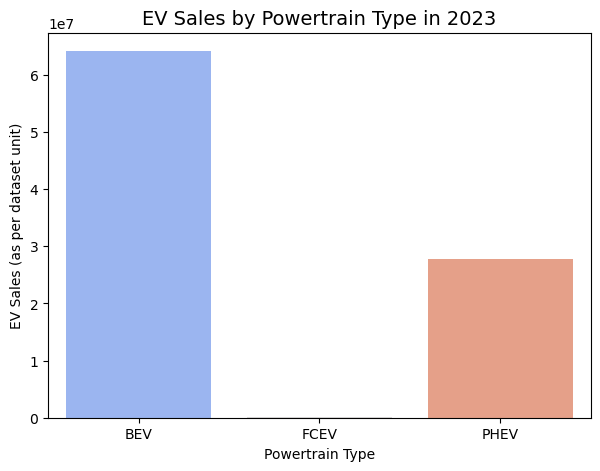

In [15]:
# Filter dataset for EV sales in the latest available year
latest_year = 2023  # change if your data goes to 2024
df_powertrain = df[(df['parameter'] == 'EV sales') & (df['year'] == latest_year)]

# Group by powertrain
powertrain_sales = df_powertrain.groupby('powertrain')['value'].sum().reset_index()

# Plot
plt.figure(figsize=(7,5))
sns.barplot(data=powertrain_sales, x='powertrain', y='value', palette='coolwarm')
plt.title(f'EV Sales by Powertrain Type in {latest_year}', fontsize=14)
plt.xlabel('Powertrain Type')
plt.ylabel('EV Sales (as per dataset unit)')
plt.show()

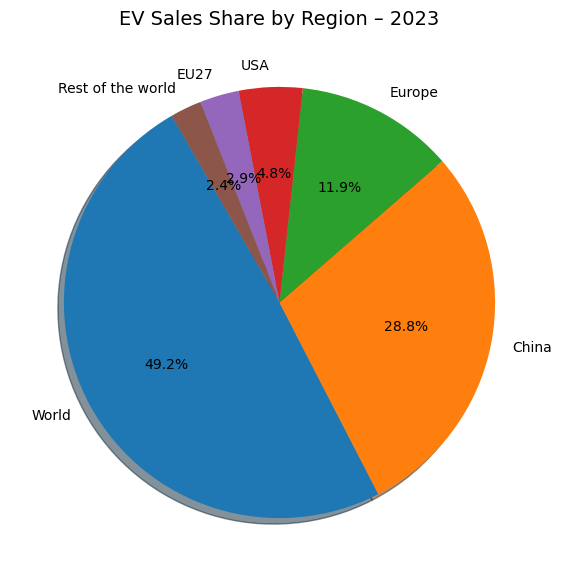

In [16]:
# Filter for EV sales in the latest year
latest_year = 2023  # change if needed
df_region_sales = df[(df['parameter'] == 'EV sales') & (df['year'] == latest_year)]

# Group by region
region_sales = df_region_sales.groupby('region')['value'].sum().reset_index()

# Sort & take top 6 for clarity
top_regions = region_sales.sort_values(by='value', ascending=False).head(6)

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(top_regions['value'],
        labels=top_regions['region'],
        autopct='%1.1f%%',
        startangle=120,
        shadow=True)
plt.title(f'EV Sales Share by Region – {latest_year}', fontsize=14)
plt.show()

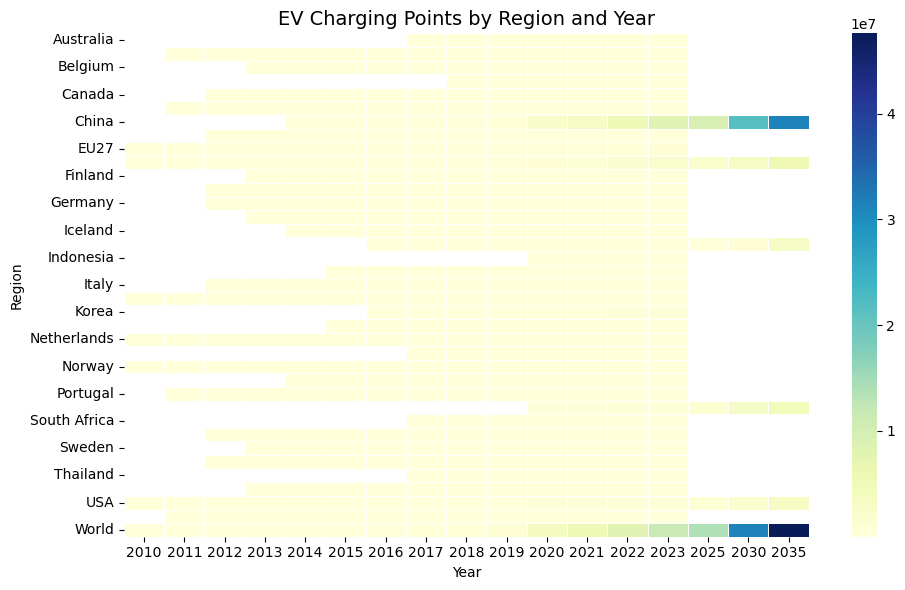

In [17]:
# Filter data for EV charging points
charging_df = df[df['parameter'] == 'EV charging points']

# Create a pivot table (rows = region, columns = year)
pivot_charging = charging_df.pivot_table(values='value', index='region', columns='year', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_charging, cmap='YlGnBu', linewidths=0.5)
plt.title('EV Charging Points by Region and Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [ ]:
This project analyzes the IEA Global EV Data 2024 to understand the growth trends, regional performance, and technological shifts in the electric vehicle market worldwide.
The analysis begins by examining the top 5 countries by EV sales. The bar chart shows that China and the United States are the dominant markets, followed by European countries. These regions have led EV adoption due to government incentives, large manufacturing capacities, and technological innovation.
The EV sales trend by country shows a continuous increase in sales from 2010 to 2024. A strong upward spike after 2018 highlights the impact of affordable EV models and improved battery technology. However, some regions display slower growth, reflecting the gap in policy support and charging infrastructure.
The EV sales by powertrain type comparison shows that Battery Electric Vehicles (BEVs) have a much higher share than Plug-in Hybrid Vehicles (PHEVs). This indicates a clear industry shift toward fully electric solutions that align with global sustainability and zero-emission goals.
The EV sales share by region pie chart shows that the Asia-Pacific region, especially China, holds the highest contribution to global EV sales. Europe and North America also play major roles, reflecting strong consumer interest and supportive environmental policies.
The heatmap of EV charging points by region and year shows how infrastructure has evolved globally. A sharp rise in charging stations is observed after 2017, particularly in China and Europe. This increase in charging infrastructure has directly supported the growth in EV adoption rates.
Overall, this analysis highlights that the global EV industry is growing rapidly due to a combination of clean energy initiatives, government policies, and technological advancements. The data clearly shows that Battery Electric Vehicles are leading the transition to sustainable transport. Furthermore, regions investing heavily in charging infrastructure are experiencing faster adoption and stronger market growth.